In [131]:
# import library we'll use 
import pandas as pd 
import numpy as np
import requests
import csv
import tweepy
import json 

This is the first stage of Data wrangling, which consists of:
    - Gathering data
    - Assessing data
    - Cleaning data
 
# Gathering:
in this stage we'll Gathering data for different sources, First source is from file contain archive of twitter account, then request data from twitter and store it on txt file contain more info and complete missing data of the first file, third source is file contain dog images.
let's start with twitter archive and read it 

In [2]:
# read twitter archive file 
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


And the number of columns and rows 

In [5]:
# number of rows and columns 
df_twitter_archive.shape

(2356, 17)

Here we'll collect missing data about first dataset from twitter API 

In [135]:
# use tweepy to import tweets from twitter API 

# Auth keys 
consumer_key = 'oTaXmVdbgZ0b9vqlfN8gRdUwA'
consumer_secret = 'cW8qW1TBD6y3my7HSE1ZRnJowYjLvkFAgx26LJEvSmv2ihOmwT'
access_token = '371387916-WCX3BPcmLS5EvskWbD1JeAISiouiH2zeV50vZu9g'
access_secret = '4ElK9tKqlJooNNih38G2J6jbHuFjVMvAgqNuY0iHqOFL7'

# bulid connection 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# make connection, wait_on_rate_limit enabled to avoid exceeding rate limit,
# wait_on_rate_limit_notify enabled to notify me when rate_limit is exceded 
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# convert ids columns to list 
tweet_ids = df_twitter_archive.tweet_id.tolist()

# count number of tweet and number of errors 
tweet_list = []
error_list = [] 

for tid in tweet_ids:
    try:
        # search for tweet via tweet id, insert it into tweet_list to write it later as json into a file  
        tweet_list.append(api.get_status(tid))
        
    except tweepy.RateLimitError as err:
        # This error happen when you exceed limits of requests  
        print('RateLimitError')
        error_list.append(tid)
        
    except tweepy.TweepError as err:
        # This error happen for many reasons such as id not found
        print('Twitter error')
        error_list.append(tid)
    except:
        print('error')
        error_list.append(tid)

# print number of tweet and number of errors 
len(tweet_list), len(error_list)

(2342, 14)

In [138]:
# convert list to JSON serializable object 
json_tweets = []
for json_object in tweet_list:
    json_tweets.append(json_object._json)

# open file and put our list as json into it 
with open('tweet_data.txt', 'w') as tweet_data:
    tweet_data.write(json.dumps(json_tweets, indent=4))

In [143]:
# Read and covert data from json format to dataframe, and read columns 
df_tweet_feed = pd.read_json('tweet_data.txt')
df_tweet_feed.columns

Index(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'text', 'truncated', 'user'],
      dtype='object')

In [144]:
# read json structure 
with open('tweet_data.txt', encoding='utf-8') as tweet_data: 
    tweet_json = json.load(tweet_data)
    print(tweet_json[0]) 

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 892420639486877696, 'id_s

In [166]:
# we'll parse json data from tweet_data.txt to df_tweet_feed data frame 

# list to store rows before add it to df 
row = []

# read tweet_data file 
with open('tweet_data.txt', encoding='utf-8') as tweet_data: 
    # load json data 
    tweet_json = json.load(tweet_data)
    # take the data object by object
    for obj in tweet_json:
        # parse 
        _id = obj['id']
        text = obj['text']
        favorite_count = obj['favorite_count']
        retweet_count = obj['retweet_count'] 
        created_at = obj['created_at']
        source = obj['source']
        user = obj['user']
        favorited = obj['favorited']
        retweeted = obj['retweeted']
        lang = obj['lang']
        retweeted_status = obj.get('retweeted_status', 'None')
        
        # add it to the list 
        row.append({'tweet_id': str(_id),
                    'text': text,
                    'favorite_count': int(favorite_count),
                    'retweet_count': int(retweet_count),
                    'created_at': created_at,
                    'favorited': favorited,
                    'retweeted': retweeted,
                    'user': user,
                    'source': source,
                    'lang' : lang,
                    'retweeted_status': retweeted_status
                            })
        # insert new row to df_tweet_feed
        df_tweet_feed = pd.DataFrame(row, columns = ['tweet_id','text', 'favorite_count', 'retweet_count',
                                                     'created_at','user','favorited', 'retweeted', 
                                                     'retweeted_status', 'source', 'lang'])

In [167]:
# first five rows 
df_tweet_feed.head()

,tweet_id,text,favorite_count,retweet_count,created_at,user,favorited,retweeted,retweeted_status,source,lang
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,38208,8369,Tue Aug 01 16:23:56 +0000 2017,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,False,None,"<a href=""http://twitter.com/download/iphone"" r...",en
1,892177421306343426,This is Tilly. She's just checking pup on you....,32756,6179,Tue Aug 01 00:17:27 +0000 2017,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,False,None,"<a href=""http://twitter.com/download/iphone"" r...",en
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,24671,4090,Mon Jul 31 00:18:03 +0000 2017,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,False,None,"<a href=""http://twitter.com/download/iphone"" r...",en
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,41529,8504,Sun Jul 30 15:58:51 +0000 2017,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,False,None,"<a href=""http://twitter.com/download/iphone"" r...",en
4,891327558926688256,This is Franklin. He would like you to stop ca...,39726,9211,Sat Jul 29 16:00:24 +0000 2017,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,False,None,"<a href=""http://twitter.com/download/iphone"" r...",en


In [168]:
# number of rows and columns
df_tweet_feed.shape

(2342, 11)

Here we'll read data from file contain dog pics uploaded here: 

- https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [7]:
# download the data of dogs image using requests library 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
data = requests.get(url)

# put data into tab separated file line by line 
with open('image_predictions.tsv', 'w') as f:
    writer = csv.writer(f)
    reader = csv.reader(data.text.splitlines())

    for row in reader:
        writer.writerow(row)

In [4]:
# reading dataset 
df_images = pd.read_csv('image_predictions.tsv', sep='\t')
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
# number of rows and columns
df_images.shape

(2075, 12)

columns description: 

    - tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
    - p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
    - p1_conf is how confident the algorithm is in its #1 prediction → 95%
    - p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
    - p2 is the algorithm's second most likely prediction → Labrador retriever
    - p2_conf is how confident the algorithm is in its #2 prediction → 1%
    - p2_dog is whether or not the #2 prediction is a breed of dog → TRUE
    - etc..

### Gathering summary 
- we collected three dataset 
    - download `twitter-archive-enhanced.csv` file from Udacity 
    - collect missing data from twitter API and store them in `tweet_data.txt`
    - download programmatically `image_predictions.tsv` from the web

# Assessing: 

So here we have three dataframes we'll find any quality and tidy issues, then we'll clean them on the next part 

let's start with twitter archive

let's start with visual assessment, [Here](https://docs.google.com/spreadsheets/d/13TLtJtwFdfLvobkrlPf2a36N9CZYiKuBU7KNHdjLmEE/edit?usp=sharing)
link for dataset on google sheet 

Some of the issues are clear such as columns with NaN's, but we'll continue with programmatically assessment then we'll summarize our finding.

let's use `head`, `tail`, amd `info`

In [10]:
df_twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
# and last 10 rows 
df_twitter_archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [21]:
# check uplicates
len(df_twitter_archive.tweet_id.unique())

2356

In [22]:
# dataframe columns info nullity and type  
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

let's breakdown some stuff here as we can see these columns  `in_reply_to_status_id`,	`in_reply_to_user_id`, `retweeted_status_id`,	`retweeted_status_user_id`, and	`retweeted_status_timestamp` looks wired with a lot of nulls, and we can see a pattern these two `retweeted_status_id`,	`retweeted_status_user_id` have 78 filled columns, and the rest have 181, so we'll group them and see what we can do 

let's start with the two first 

In [69]:
df_twitter_archive[df_twitter_archive['in_reply_to_status_id'].notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


So all tweets on this group are **replies**, let's see the outher group 

In [80]:
df_twitter_archive[df_twitter_archive['retweeted_status_user_id'].notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


Here we have two type of tweets, First retweet to dog_rates and retweet for other account, the question here how we can identify them, the answer is using `retweeted_status_user_id`, this id `4.196984e+09` for out account so we'll keep the tweet, other than that we'll drop it, before that let's test this. 

In [99]:
df_twitter_archive[(df_twitter_archive['retweeted_status_user_id'].notnull()) & (df_twitter_archive['retweeted_status_user_id'] != 4196983835)].head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
101,872668790621863937,NaN,NaN,2017-06-08 04:17:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @loganamnosis: Penelope here is doing me qu...,8.726576e+17,1.547674e+08,2017-06-08 03:32:35 +0000,https://twitter.com/loganamnosis/status/872657...,14,10,None,None,None,None,None
130,867072653475098625,NaN,NaN,2017-05-23 17:40:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachaeleasler: these @dog_rates hats are 1...,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,https://twitter.com/rachaeleasler/status/86501...,13,10,None,None,None,None,None
160,860924035999428608,NaN,NaN,2017-05-06 18:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @tallylott: h*ckin adorable promposal. 13/1...,8.609145e+17,3.638908e+08,2017-05-06 17:49:42 +0000,https://twitter.com/tallylott/status/860914485...,13,10,None,None,None,None,None


if you check all of them you'll find that all of them tweet not belong to `dog_rate`, just retweets 

Now let's summraize issues from this dataframe:
- tidiness 
    - there are four columns for type of dog (doggo, floofer, pupper, puppo), and we should have each variable forms a column
        
- quality 
    - `rating_denominator` is filled with 10 which is duplicate data 
    - `name` has a, an, and the which is Indefinite Articles not names. 
    - `name` also has `quite` if you checked the tweet you'll find that it's not a dog name so we'll replace it with None as well 
    - we have many tweet contain just replies. 
    - we have many tweet are retweet for another account 
    - `retweeted_status_user_id` has this format 4.196984e+09 for user id 
    - There are columns filled with NaNs
    
    
Now let's move on to next dataframe which is twitter feed 

In [169]:
df_tweet_feed.head(1)

,tweet_id,text,favorite_count,retweet_count,created_at,user,favorited,retweeted,retweeted_status,source,lang
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,38208,8369,Tue Aug 01 16:23:56 +0000 2017,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,False,None,"<a href=""http://twitter.com/download/iphone"" r...",en


as you can see there are a lot of columns that I don't need, so I'll make sub-dataframe include only that columns that I'm interested in

In [171]:
df_tweet_feed[['tweet_id', 'retweet_count', 'favorite_count']].head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8369,38208
1,892177421306343426,6179,32756
2,891815181378084864,4090,24671
3,891689557279858688,8504,41529
4,891327558926688256,9211,39726


In [172]:
# check nullity 
df_tweet_feed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 11 columns):
tweet_id            2342 non-null object
text                2342 non-null object
favorite_count      2342 non-null int64
retweet_count       2342 non-null int64
created_at          2342 non-null object
user                2342 non-null object
favorited           2342 non-null bool
retweeted           2342 non-null bool
retweeted_status    2342 non-null object
source              2342 non-null object
lang                2342 non-null object
dtypes: bool(2), int64(2), object(7)
memory usage: 169.3+ KB


In [173]:
# check inaccurate data if a count is negative 
df_tweet_feed[(df_tweet_feed.retweet_count < 0) | (df_tweet_feed.favorite_count < 0)]

,tweet_id,text,favorite_count,retweet_count,created_at,user,favorited,retweeted,retweeted_status,source,lang


- tidiness 
    - Here we have retweet count and favorite count on table and the rest of data on another table `df_twitter_archive`, and we should have each observational unit forms a table
        
- quality 
    - The only issue with content here is that we have a lot of columns that we are not interested in
    
last dataframe we have is `df_images`

let's start with visual assessment, [Here](https://docs.google.com/spreadsheets/d/1zjSQ1GRV5fHfNoPd5cxqCYeBgWT9B1R5WWMsqwPcVW4/edit?usp=sharing) link for google sheet  

In [44]:
# check nullity 
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [47]:
# here I'm checking manually some of the pics predicted from the models as not dogs  
df_images[(((df_images.p1_dog) | (df_images.p2_dog)) | (df_images.p3_dog)) == False ]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


from what I saw there are many images are predicted not dogs but it's dog, so I'll keep all of them. 

In [48]:
# here we'll check two type of issue negativity and percentage above one which is confusing  
df_images[(df_images.p1_conf < 0) | (df_images.p2_conf < 0) | (df_images.p3_conf < 0)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [49]:
df_images[(df_images.p1_conf > 1) | (df_images.p2_conf > 1) | (df_images.p3_conf > 1)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [51]:
# check duplicate
len(df_images.tweet_id.unique()), df_images.shape[0]

(2075, 2075)

- quality
    - First, columns name, p1, or p1_conf even p1_dog is not descriptive. 
    - and we have prediction percentage like `4.588540e-02` and another like `0.404640`
    - dogs type has underscore `_` between names of two parts, which is not clear for normal user.  

### Assessment summary: 
- Tidiness 
    - `Twitter Archive` table: there are four columns for type of dog (doggo, floofer, pupper, puppo), and we should have each variable forms a column
    - `Twitter feed` table: Here we have retweet count and favorite count on table and the rest of data on another table `df_twitter_archive`, and we should have each observational unit forms a table
    
- Quality 
    - `Twitter Archive` table: `rating_denominator` is filled with 10 which is duplicate data 
    - `Twitter Archive` table: `name` has a, an, and the which is Indefinite Articles not names.
    - `Twitter Archive` table: `name` also has `quite` if you checked the tweet you'll find that it's not a dog name so we'll replace it with None as well 
    - `Twitter Archive` table: we have many tweet contain just replies. 
    - `Twitter Archive` table: we have many tweet are retweet for another account 
    - `Twitter Archive` table: `retweeted_status_user_id` has this format 4.196984e+09 for user id 
    - `Twitter Archive` table: There are columns filled with NaNs
    - `Twitter feed` table: The only issue with content here is that we have a lot of columns that we are not interested in
    - `Images` table: First, columns name, p1, or p1_conf even p1_dog is not descriptive. 
    - `Images` table: and we have prediction percentage like `4.588540e-02` and another like `0.404640`
    - `Images` table: dogs type has underscore `_` between names of two parts, which is not clear for normal user.  

# Cleaning: 

In this part we'll fix previous issues we minstined, then we'll compine the table one or more as we need

In [174]:
# it's good habit to make a copy of table 
clean_df_twitter_archive = df_twitter_archive.copy()
clean_df_images = df_images.copy()
clean_df_tweet_feed = df_tweet_feed.copy()

so let's start by Quality issues from `Twitter Archive` table
- `Twitter Archive` table: `rating_denominator` is filled with 10 which is duplicate data 
- `Twitter Archive` table: `name` has a, an, and the which is Indefinite Articles not names.
- `Twitter Archive` table: `name` also has `quite` if you checked the tweet you'll find that it's not a dog name so we'll replace it with None as well 
- `Twitter Archive` table: we have many tweet contain just replies. 
- `Twitter Archive` table: we have many tweet are retweet for another account 
- `Twitter Archive` table: `retweeted_status_user_id` has this format 4.196984e+09 for user id 
- `Twitter Archive` table: There are columns filled with NaNs

In [31]:
# define: rating_denominator is filled with 10 or wrong input which is duplicate data
clean_df_twitter_archive.rating_denominator.values

array([10, 10, 10, ..., 10, 10, 10])

In [10]:
# clean: let's drop rating_denominator columns 
clean_df_twitter_archive = clean_df_twitter_archive.drop(columns=['rating_denominator'])

In [11]:
# test 
clean_df_twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [32]:
# define: name has a, an, and the which is Indefinite Articles not names.
clean_df_twitter_archive[(clean_df_twitter_archive.name == 'the') | \
                         (clean_df_twitter_archive.name == 'an')  | \
                         (clean_df_twitter_archive.name == 'a')].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None


In [14]:
# clean: replace Indefinite Articles with None 
indefinite_articles = dict.fromkeys(['a','an','the'], 'None')
clean_df_twitter_archive['name'].replace(indefinite_articles,inplace = True)

In [15]:
# test 
clean_df_twitter_archive[(clean_df_twitter_archive.name == 'the') | \
                         (clean_df_twitter_archive.name == 'an')  | \
                         (clean_df_twitter_archive.name == 'a')].shape[0]

0

In [33]:
# define: name also has quite if you checked the tweet you'll find that it's not a dog name 
clean_df_twitter_archive[clean_df_twitter_archive.name == 'quite'].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
2326,666411507551481857,NaN,NaN,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507...,2,10,quite,None,None,None,None


In [17]:
# clean: replace quite with None 
clean_df_twitter_archive['name'].replace({'quite':'None'},inplace = True)

In [18]:
# test 
clean_df_twitter_archive[clean_df_twitter_archive.name == 'quite'].shape[0]

0

In [34]:
# define: remove tweets that just replies not contain image 
clean_df_twitter_archive[clean_df_twitter_archive['in_reply_to_status_id'].notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [20]:
# clean: drop all rows with replies
clean_df_twitter_archive = clean_df_twitter_archive[clean_df_twitter_archive['in_reply_to_status_id'].isnull()]

In [21]:
# test
clean_df_twitter_archive[clean_df_twitter_archive['in_reply_to_status_id'].notnull()].shape[0]

0

In [35]:
# define: now we'll remove tweet that not belong to dog_rate account (retweet)
to_drop_df = clean_df_twitter_archive[(clean_df_twitter_archive['retweeted_status_user_id'].notnull()) &\
                               (clean_df_twitter_archive['retweeted_status_user_id'] != 4196983835)]
to_drop_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
101,872668790621863937,NaN,NaN,2017-06-08 04:17:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @loganamnosis: Penelope here is doing me qu...,8.726576e+17,1.547674e+08,2017-06-08 03:32:35 +0000,https://twitter.com/loganamnosis/status/872657...,14,10,None,None,None,None,None
130,867072653475098625,NaN,NaN,2017-05-23 17:40:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachaeleasler: these @dog_rates hats are 1...,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,https://twitter.com/rachaeleasler/status/86501...,13,10,None,None,None,None,None
160,860924035999428608,NaN,NaN,2017-05-06 18:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @tallylott: h*ckin adorable promposal. 13/1...,8.609145e+17,3.638908e+08,2017-05-06 17:49:42 +0000,https://twitter.com/tallylott/status/860914485...,13,10,None,None,None,None,None


In [37]:
# clean: 4196983835 this dog_rate id, so we'll remove any other row contain different id
clean_df_twitter_archive.drop(to_drop_df.index, inplace=True)

In [38]:
# test 
clean_df_twitter_archive[(clean_df_twitter_archive['retweeted_status_user_id'].notnull()) &\
                               (clean_df_twitter_archive['retweeted_status_user_id'] != 4196983835)].shape[0]

0

In [40]:
# define: retweeted_status_user_id has this float format 4.196984e+09 or 4196983835.0 it should be like this 4196983835
clean_df_twitter_archive.loc[36,'retweeted_status_user_id']

4196983835.0

In [41]:
# clean: convert type from float to int 
clean_df_twitter_archive['retweeted_status_user_id'] = clean_df_twitter_archive['retweeted_status_user_id'].fillna(0.0).astype('int')

In [42]:
# test 
clean_df_twitter_archive.loc[36,'retweeted_status_user_id']

4196983835

In [43]:
# define: here we want to drop columns filled with nulls 
clean_df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2331 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2331 non-null object
source                        2331 non-null object
text                          2331 non-null object
retweeted_status_id           156 non-null float64
retweeted_status_user_id      2331 non-null int64
retweeted_status_timestamp    156 non-null object
expanded_urls                 2273 non-null object
rating_numerator              2331 non-null int64
rating_denominator            2331 non-null int64
name                          2331 non-null object
doggo                         2331 non-null object
floofer                       2331 non-null object
pupper                        2331 non-null object
puppo                         2331 non-null object
dtypes: float64(3), int64(4), obj

In [44]:
# clean: in_reply_to_status_id, in_reply_to_user_id these two we'll drop them
clean_df_twitter_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

In [45]:
# test 
clean_df_twitter_archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [175]:
# now twitter feed table, The only issue with this table is that we have a lot of columns that we are not  interested in
# we are only interested in these three `tweet_id`, `retweet_count`, `favorite_count`
clean_df_tweet_feed.head(1)

,tweet_id,text,favorite_count,retweet_count,created_at,user,favorited,retweeted,retweeted_status,source,lang
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,38208,8369,Tue Aug 01 16:23:56 +0000 2017,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,False,None,"<a href=""http://twitter.com/download/iphone"" r...",en


In [178]:
# clean drop other columns 
clean_df_tweet_feed = clean_df_tweet_feed[['tweet_id', 'retweet_count', 'favorite_count']]

In [179]:
# test 
clean_df_tweet_feed.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8369,38208


for `images` table, we have three quality issues 
- First, columns name, p1, or p1_conf even p1_dog is not descriptive. 
- dogs type has underscore `_` between names of two parts, which is not clear for normal user.  

In [49]:
# define: p1 should be prediction_1, p1_conf should be confidence_1, p1_dog to dog_type_1, same for others 2 and 3 
clean_df_images.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [51]:
# clean: rename columns 
columns_names = {'p1': 'prediction_1', 'p1_conf': 'confidence_1', 'p1_dog': 'is_dog_1', \
                 'p2': 'prediction_2', 'p2_conf': 'confidence_2', 'p2_dog': 'is_dog_2', \
                 'p3': 'prediction_3', 'p3_conf': 'confidence_3', 'p3_dog': 'is_dog_3'}
clean_df_images.rename(index=str, columns=columns_names, inplace=True)

In [52]:
# test 
clean_df_images.head(1)

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,is_dog_1,prediction_2,confidence_2,is_dog_2,prediction_3,confidence_3,is_dog_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [246]:
# define: here we have underscore on prediction_# columns 
clean_df_images.head()

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,is_dog_1,prediction_2,confidence_2,is_dog_2,prediction_3,confidence_3,is_dog_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [53]:
# clean: remove underscore on dog type, prediction_# columns 
clean_df_images['prediction_1'] = clean_df_images['prediction_1'].str.replace('_', ' ')
clean_df_images['prediction_2'] = clean_df_images['prediction_2'].str.replace('_', ' ')
clean_df_images['prediction_3'] = clean_df_images['prediction_3'].str.replace('_', ' ')

In [54]:
# test 
clean_df_images.head()

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,is_dog_1,prediction_2,confidence_2,is_dog_2,prediction_3,confidence_3,is_dog_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


we did all quality issues now let's fix Tidiness two issues  
- `Twitter Archive` table: there are four columns for type of dog (doggo, floofer, pupper, puppo), and we should have each variable forms a column
- `Twitter feed` table: we have retweet count and favorite count on table and the rest of data on another table `df_twitter_archive`, and we should have each observational unit forms a table

In [255]:
# define: there are four columns for type of dog (doggo, floofer, pupper, puppo), and we should have each variable forms a column
clean_df_twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo,characteristic
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,0,NaN,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,0,NaN,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,0,NaN,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,0,NaN,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,0,NaN,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,0,NaN,https://twitter.com/dog_rates/status/891087950...,13,None,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,0,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,Jax,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,0,NaN,https://twitter.com/dog_rates/status/890729181...,13,None,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,0,NaN,https://twitter.com/dog_rates/status/890609185...,13,Zoey,None,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,0,NaN,https://twitter.com/dog_rates/status/890240255...,14,Cassie,doggo,None,None,None,None


In [56]:
# clean: create new column characteristic has the type of dog, then drop the columns 
clean_df_twitter_archive.assign(characteristic='None')
# assigne non-None vaules to characteristic
clean_df_twitter_archive.loc[clean_df_twitter_archive.doggo != 'None','characteristic'] = 'doggo'
clean_df_twitter_archive.loc[clean_df_twitter_archive.floofer != 'None','characteristic'] = 'floofer'
clean_df_twitter_archive.loc[clean_df_twitter_archive.pupper != 'None','characteristic'] = 'pupper'
clean_df_twitter_archive.loc[clean_df_twitter_archive.puppo != 'None','characteristic'] = 'puppo'

# drop 'doggo', 'floofer','puppo', and 'pupper'
clean_df_twitter_archive.drop(['doggo', 'floofer','puppo', 'pupper'], axis=1, inplace=True)

In [59]:
# test assignment
clean_df_twitter_archive[clean_df_twitter_archive.characteristic.notnull()].head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,characteristic
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,0,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
12,889665388333682689,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,0,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,puppo
14,889531135344209921,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,0,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo
29,886366144734445568,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,0,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,pupper
43,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,0,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo


In [60]:
# test droping 
clean_df_twitter_archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'characteristic'],
      dtype='object')

In [62]:
# define: we have retweet count and favorite count on table and the rest of data on another table `df_twitter_archive`,
#   and we should have each observational unit forms a table
clean_df_twitter_archive.head(1)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,characteristic
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,0,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN


In [180]:
clean_df_tweet_feed.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8369,38208


In [183]:
# clean: compine retweet and favorite count with tweet on same table 
clean_df = pd.concat([clean_df_twitter_archive, clean_df_tweet_feed], axis=1, join='inner')

In [193]:
# test 
clean_df[['tweet_id']].head(1)

,tweet_id,tweet_id
0,892420643555336193,892420643555336193


now we'll enhance the table by:
- droping unneeded columns `tweet_id` (duplicated), `expanded_urls`, and `source`.

In [84]:
# define: droping unneeded columns id, expanded_urls, and source 
#  duplicate data, id is tweet_id and expanded_urls and source you can bulid url so you don't need them
clean_df.head(1)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,characteristic,id,retweet_count,favorite_count
0,8.924206e+17,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,0.0,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,8.924206e+17,8374.0,38219.0


In [194]:
# clean: droping unneeded expanded_urls and source columns
clean_df.drop(['expanded_urls','source'], axis=1, inplace=True)

# clean: droping duplicated columns(s) 'tweet id'
clean_df = clean_df.iloc[:,~clean_df.columns.duplicated()]

In [195]:
# test 
clean_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,Phineas,None,None,None,None,8369,38208


### Cleaning summary:
We fixed all quality and tidiness issues reported on assessment part, then we enhanced the table by:
- droping unneeded columns `id`, `expanded_urls`, and `source`. 

# Store date on file 
we'll compine and store our dataframe in one master file as CSV `twitter_archive_master`

In [201]:
# separated files 
clean_df.to_csv('twitter_archive.csv')
clean_df_images.to_csv('clean_images_pred.csv')

In [202]:
# master file 
master_df = pd.concat([clean_df, clean_df_images], axis=1, join='inner')
master_df.to_csv('twitter_archive_master.csv')
master_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,...,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


# visualization and insights
to ensure that we have the files we'll read them and visualize the data 

In [203]:
import matplotlib as plt 
import seaborn as sns 

In [204]:
tweets_df = pd.read_csv('twitter_archive_master.csv')

In [205]:
tweets_df.head(1)

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,...,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


now let's do some visualization and find insights,

let's see distribution of retweet count and favorite count

/Users/abdulazizalawshan/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


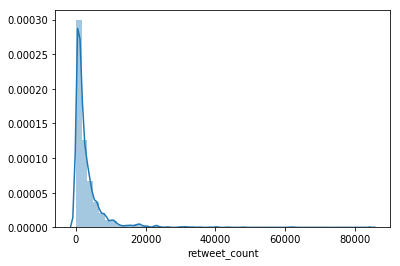

In [206]:
sns.distplot(tweets_df.retweet_count)

/Users/abdulazizalawshan/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


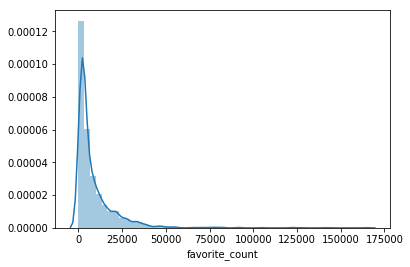

In [207]:
sns.distplot(tweets_df.favorite_count)

what about rating 

/Users/abdulazizalawshan/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


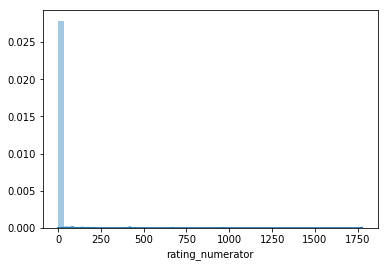

In [208]:
sns.distplot(tweets_df.rating_numerator)

There is a problem with this chart as we close to zero there is outlier, let's remove numbers less than 50 

/Users/abdulazizalawshan/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


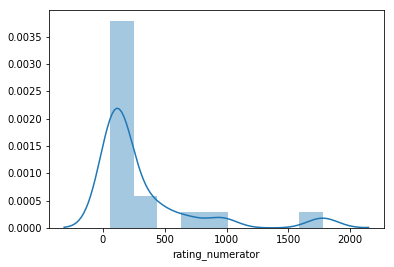

In [209]:
sns.distplot(tweets_df[tweets_df['rating_numerator'] > 50].rating_numerator)

from above charts we can say in general that more likely to an image to get less 100 rate, retweet, and favorite

let's look on something else interesting, is the number of  retweet more or the number of favorite?

In [210]:
# sum of favorite
tweets_df.favorite_count.sum()

18429840

In [211]:
# sum of retweet
tweets_df.retweet_count.sum()

6780391

we can say the number of favorite more than the number of retweet in general 

finally let's find is there a linear correlation between these variables

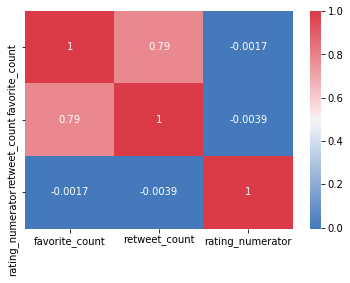

In [212]:
corr = tweets_df[['favorite_count','retweet_count','rating_numerator']].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(250, 10, as_cmap=True), annot=True)

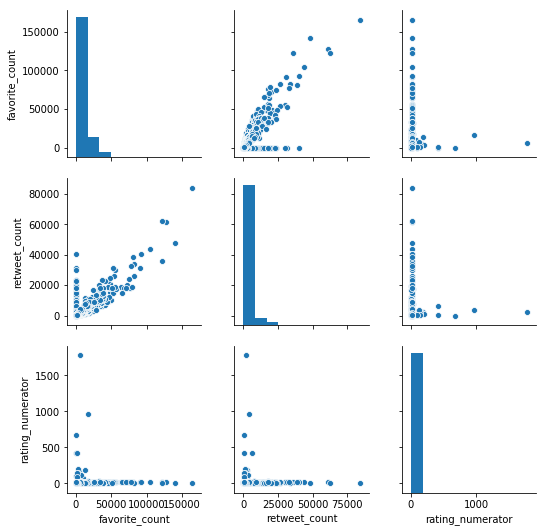

In [213]:
sns.pairplot(tweets_df[['favorite_count','retweet_count','rating_numerator']])

From these chart above there is clear a linear correlation between `favorite_count` and `retweet_count` with correlation coefficient of 0.8, unlike `rating_numerator`